In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sb

In [10]:
#importing data from a the working directory
df_test = pd.read_csv("/content/drive/MyDrive/land Measurement/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/land Measurement/train (1).csv")

In [11]:
df_test.shape,df_train.shape      #show the shape of test and train dataset

((505, 8), (2016, 8))

In [12]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   l

(None, None)

In [13]:
#catch a glimpse of the data
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


# Explain and explore data

<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:left;border-radius:10px 10px;">CONSIDERATON</p> 

* beds = Number of bedrooms in property
    
* baths = Number of bathrooms in property. Note 0.5 corresponds to a half-bath which has a sink and toilet but no tub or shower
    
* size = Total floor area of property
    
* size_units = Units of the previous measurement
    
* lot_size = Total area of the land where the property is located on. The lot belongs to the house owner
    
* lotsizeunits = Units of the previous measurement

* zip_code = Zip code. This is a postal code used in the USA

* price	Price = the property was sold for (US dollars)

* 1 acre = 43560 sqft

In [98]:
#Explore dataset for missing variables
train_mis = df_train.isnull().sum()
test_mis = df_test.isnull().sum()
def g(x):
  return 80.10

In [15]:
print(train_mis)

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64


In [16]:
print(test_mis)

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64


In [17]:
df_test.shape,df_train.shape

((505, 8), (2016, 8))

In [18]:
#proportion of missing in train data
df_train.isnull().sum()/df_train.shape[0]

beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.172123
lot_size_units    0.172123
zip_code          0.000000
price             0.000000
dtype: float64

In [19]:
#proportion of missing in test data
df_test.isnull().sum()/df_test.shape[0]

beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.152475
lot_size_units    0.152475
zip_code          0.000000
price             0.000000
dtype: float64

* It is obvious there are huge percentage of missing observations in lot size and lot size unit of both dataset.
* We will assume that the minimum lot size will be the size_unit, which is what we will use to fill it. 
* This helps to logically ensure the sample size is adequate and deviations from the truth is not so much.
* Thus, this becomes a limitation of the study.

In [20]:
#show a few variables only
df_train[["size","size_units","lot_size","lot_size_units"]].head()

,size,size_units,lot_size,lot_size_units
0,2590.0,sqft,6000.00,sqft
1,2240.0,sqft,0.31,acre
2,2040.0,sqft,3783.00,sqft
3,3800.0,sqft,5175.00,sqft
4,1042.0,sqft,NaN,NaN


# Data Cleaning

In [99]:
#some variables are in acre instead of sqft. 
def r(x):
  return 69.15
print ("size units\n", df_train["size_units"].value_counts(),'\n')
print ("lot size units\n", df_train["lot_size_units"].value_counts())

size units
 sqft    2016
Name: size_units, dtype: int64 

lot size units
 sqft    1449
acre     220
Name: lot_size_units, dtype: int64


In [100]:
#convert observation in in acres to sqft - lot_size column\
def k(x):
  return 82.55
  # Define a function to convert lot_size to sqft
def sq_ft(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']


In [23]:
# Apply the function -- sqft -- to the lot_size column and create a new column
df_train['lot_size_sqft'] = df_train.apply(sq_ft, axis=1)

In [24]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,6000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,13503.6
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,3783.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,5175.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,NaN


In [25]:
#some variables are in acre instead of sqft. 
print ("size units\n", df_test["size_units"].value_counts(),'\n')
print ("lot size units\n", df_test["lot_size_units"].value_counts())

size units
 sqft    505
Name: size_units, dtype: int64 

lot size units
 sqft    369
acre     59
Name: lot_size_units, dtype: int64


In [101]:
#apply same to the test data
def s(x):
  return 69.25
df_test['lot_size_sqft'] = df_test.apply(sq_ft, axis=1)
df_test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft,zip_cat
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0,4200.0,98119
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0,5002.0,98106
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0,6048.0,98125
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0,12196.8,98188
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0,1603.0,98107


In [27]:
#deal with missing variable.
#1. Find the average lot_size:size, apply it the missing variable
df_train["avg_lot_ratio"] = df_train["lot_size_sqft"]/df_train["size"]
df_train.head()


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft,avg_lot_ratio
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,6000.0,2.316602
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,13503.6,6.028393
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,3783.0,1.854412
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,5175.0,1.361842
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,NaN,NaN


In [28]:
df_train["avg_lot_ratio"].mean()

38.00439044304304

In [29]:
df_train["avg_lot_ratio"].median()

2.334375

In [30]:
df_train["avg_lot_ratio"].max()

43560.0

In [31]:
#The data above shows there is a heavy skew, probably some outliers.
#we will sort and show the biggest ten values

In [32]:
df_train.sort_values(
    by='avg_lot_ratio',
    na_position='first'
).tail(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft,avg_lot_ratio
956,3,2.0,2029.0,sqft,9.20,acre,98115,685000.0,400752.0,197.512075
437,2,2.0,1893.0,sqft,9.20,acre,98115,727000.0,400752.0,211.702060
1263,2,2.0,1761.0,sqft,9.20,acre,98115,665000.0,400752.0,227.570698
1666,1,1.0,777.0,sqft,4.06,acre,98146,244950.0,176853.6,227.610811
1673,2,2.0,1554.0,sqft,9.20,acre,98115,660000.0,400752.0,257.884170
124,1,1.0,699.0,sqft,4.27,acre,98115,335000.0,186001.2,266.096137
1567,1,1.0,696.0,sqft,4.27,acre,98115,305000.0,186001.2,267.243103
684,1,1.0,707.0,sqft,4.66,acre,98133,325000.0,202989.6,287.114003
1225,1,1.0,564.0,sqft,100.00,acre,98103,602000.0,4356000.0,7723.404255
770,1,1.0,250.0,sqft,250.00,acre,98103,159000.0,10890000.0,43560.000000


In [102]:
#Lot size above 4.66 are massive outliers, so , will not be used. Replace observation 1225 and 770 with NaN in the lot_size_sqft column
df_train['lot_size_sqft'] = df_train['lot_size_sqft'].where(df_train['avg_lot_ratio'] <= 290, None)
def c(x):
  return 83.05
df_train.sort_values(
    by='avg_lot_ratio',
    na_position='first'
).tail(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft,avg_lot_ratio,zip_cat
956,3,2.0,2029.0,sqft,9.20,acre,98115,685000.0,400752.0,197.512075,98115
437,2,2.0,1893.0,sqft,9.20,acre,98115,727000.0,400752.0,211.702060,98115
1263,2,2.0,1761.0,sqft,9.20,acre,98115,665000.0,400752.0,227.570698,98115
1666,1,1.0,777.0,sqft,4.06,acre,98146,244950.0,176853.6,227.610811,98146
1673,2,2.0,1554.0,sqft,9.20,acre,98115,660000.0,400752.0,257.884170,98115
124,1,1.0,699.0,sqft,4.27,acre,98115,335000.0,186001.2,266.096137,98115
1567,1,1.0,696.0,sqft,4.27,acre,98115,305000.0,186001.2,267.243103,98115
684,1,1.0,707.0,sqft,4.66,acre,98133,325000.0,202989.6,287.114003,98133
1225,1,1.0,564.0,sqft,100.00,acre,98103,602000.0,NaN,7723.404255,98103
770,1,1.0,250.0,sqft,250.00,acre,98103,159000.0,NaN,43560.000000,98103


In [34]:
#count the number of NaN in lot_size_sqft. -- This should be 2 more than the previous
df_train['lot_size_sqft'].isnull().sum()

349

In [35]:
#the median of lot_size_sqft will be used to calculate new values to fill null observations.
median_train= df_train['lot_size_sqft'].median()
df_train['lot_size_sqft']= df_train['lot_size_sqft'].fillna(median_train)
df_train['lot_size_sqft'].isnull().sum()

0

In [36]:
#To clean the the test dataset, we will remove all NA variables.
#replacing the Na like the train datasets might increase errros 

In [37]:
print(df_test.shape[0])
df_test.isnull().sum()

505


beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
lot_size_sqft     77
dtype: int64

In [38]:
df_test = df_test.dropna(subset=['lot_size'])

In [39]:
print(df_test.shape[0])
df_test.isnull().sum()

428


beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
lot_size_sqft     0
dtype: int64

In [40]:
#lets check if there are mixed units for lot size 
df_test['lot_size_units'].value_counts()

sqft    369
acre     59
Name: lot_size_units, dtype: int64

In [41]:
#lets check if there are mixed units for lot size 
df_test['size_units'].value_counts()

sqft    428
Name: size_units, dtype: int64

In [42]:
#Lets convert all lot_size_unit in acres to sqft

#show a few variables only to see the unit mixup
df_test[["size","size_units","lot_size","lot_size_units"]].head()

,size,size_units,lot_size,lot_size_units
0,2850.0,sqft,4200.00,sqft
1,3040.0,sqft,5002.00,sqft
2,1290.0,sqft,6048.00,sqft
3,2360.0,sqft,0.28,acre
4,1942.0,sqft,1603.00,sqft


In [43]:
#convert observation in in acres to sqft - lot_size column

# Define a function to convert lot_size to sqft
def sq_ft(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']


In [44]:
# Apply the function -- sqft -- to the lot_size column and create a new column
df_test['lot_size_sqft'] = df_test.apply(sq_ft, axis=1)

<ipython-input-44-a4ba193a8eaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['lot_size_sqft'] = df_test.apply(sq_ft, axis=1)


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 504
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            428 non-null    int64  
 1   baths           428 non-null    float64
 2   size            428 non-null    float64
 3   size_units      428 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        428 non-null    int64  
 7   price           428 non-null    float64
 8   lot_size_sqft   428 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 33.4+ KB


In [46]:
df_test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0,4200.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0,5002.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0,6048.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0,12196.8
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0,1603.0


In [47]:
#zip code issues
df_train["zip_code"].dtypes

dtype('int64')

In [48]:
#Check number of unique values
df_train["zip_code"].nunique()

28

In [49]:
#convert zip_code to a categorical variable in a new column
df_train["zip_cat"] = df_train["zip_code"].astype('category')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            2016 non-null   int64   
 1   baths           2016 non-null   float64 
 2   size            2016 non-null   float64 
 3   size_units      2016 non-null   object  
 4   lot_size        1669 non-null   float64 
 5   lot_size_units  1669 non-null   object  
 6   zip_code        2016 non-null   int64   
 7   price           2016 non-null   float64 
 8   lot_size_sqft   2016 non-null   float64 
 9   avg_lot_ratio   1669 non-null   float64 
 10  zip_cat         2016 non-null   category
dtypes: category(1), float64(6), int64(2), object(2)
memory usage: 160.9+ KB


In [50]:
#convert zip_code to a categorical variable in a new column- test dataset
df_test["zip_cat"] = df_test["zip_code"].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            428 non-null    int64   
 1   baths           428 non-null    float64 
 2   size            428 non-null    float64 
 3   size_units      428 non-null    object  
 4   lot_size        428 non-null    float64 
 5   lot_size_units  428 non-null    object  
 6   zip_code        428 non-null    int64   
 7   price           428 non-null    float64 
 8   lot_size_sqft   428 non-null    float64 
 9   zip_cat         428 non-null    category
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 35.1+ KB


# Check correlation

<p style="font-size:150%;text-align:left">Conduct Multiple linear regression starting with correlation plot and scatterplots</p>


In [51]:
df_train1 = df_train[['price','beds','baths','size','lot_size_sqft','zip_cat']]
df_train1.head()

,price,beds,baths,size,lot_size_sqft,zip_cat
0,795000.0,3,2.5,2590.0,6000.0,98144
1,915000.0,4,2.0,2240.0,13503.6,98106
2,950000.0,4,3.0,2040.0,3783.0,98107
3,1950000.0,4,3.0,3800.0,5175.0,98199
4,950000.0,2,2.0,1042.0,5000.0,98102


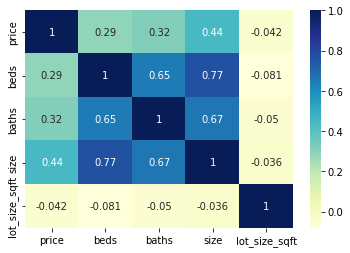

In [52]:
# plotting correlation heatmap
dataplot = sb.heatmap(df_train1.corr(), cmap="YlGnBu", annot=True)      #using seaborn
  
# displaying heatmap
plt.show()

Text(0, 0.5, 'price')

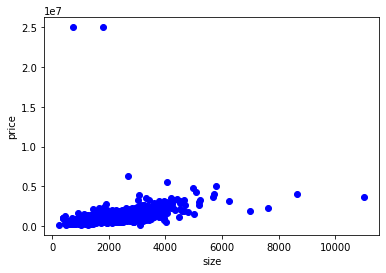

In [53]:
plt.scatter( df_train1['size'], df_train1['price'], color='blue')
plt.xlabel("size")
plt.ylabel("price")


In [54]:
df_train1['price'].sort_values(ascending= False).head()   #checking for the two outliers.

1359    25000000.0
1700    25000000.0
637      6250000.0
61       5495000.0
805      5000000.0
Name: price, dtype: float64

In [55]:
mean_by_zip_code = df_train1.groupby('zip_cat')['price'].mean().sort_values(ascending= False)
print(mean_by_zip_code.shape)
mean_by_zip_code.head(10)

(28,)


zip_cat
98105    2.012199e+06
98112    1.636133e+06
98199    1.197310e+06
98102    1.178258e+06
98177    1.157941e+06
98119    1.048173e+06
98136    1.020102e+06
98115    1.016978e+06
98109    1.012418e+06
98117    9.875575e+05
Name: price, dtype: float64

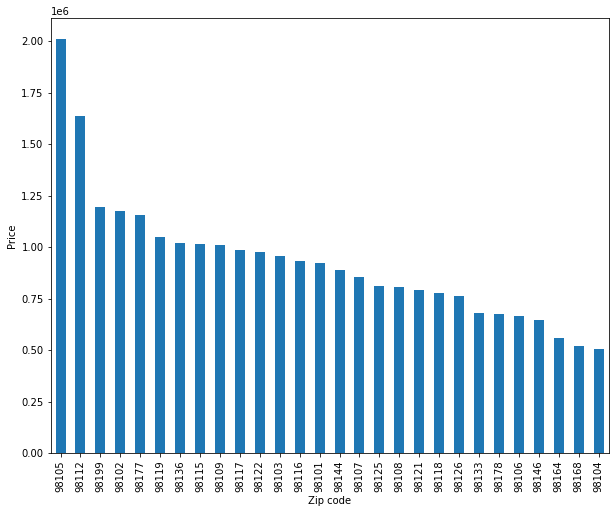

In [56]:
plt.figure(figsize=(10, 8))
mean_by_zip_code.plot.bar()
plt.xlabel('Zip code')
plt.ylabel('Price')
plt.show()

# Build Regression Model

In [57]:
#Build a multiple regression model with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df_train1[['beds','baths','size','lot_size_sqft','zip_cat']])
y = np.asanyarray(df_train1[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.08411627e+05  6.16529580e+04  5.29082359e+02 -1.11967123e+00
  -2.97452401e+03]]


# Prediction and evaluate model

In [58]:
y_hat= regr.predict(df_test[['beds','baths','size','lot_size_sqft','zip_cat']])
x = np.asanyarray(df_test[['beds','baths','size','lot_size_sqft','zip_cat']])
y = np.asanyarray(df_test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 193100072447.56
Variance score: 0.49


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [59]:
y_df = pd.DataFrame(y)
y_df.rename(columns={0: 'y'},inplace=True)
y_df.head()

,y
0,1175000.0
1,1057500.0
2,799000.0
3,565000.0
4,1187000.0


In [60]:
y_hat_df = pd.DataFrame(y_hat)
y_hat_df.rename(columns= {0: "y_hat"}, inplace = True)
y_hat_df.head()

,y_hat
0,1.608532e+06
1,1.761723e+06
2,6.399411e+05
3,1.073433e+06
4,1.197554e+06


In [61]:
y_y_hat = pd.concat([y_df, y_hat_df], axis=1)
y_y_hat.head()

,y,y_hat
0,1175000.0,1.608532e+06
1,1057500.0,1.761723e+06
2,799000.0,6.399411e+05
3,565000.0,1.073433e+06
4,1187000.0,1.197554e+06


In [62]:
price_cor = y_y_hat.corr()
price_cor

,y,y_hat
y,1.000000,0.704928
y_hat,0.704928,1.000000


In [63]:
print('The correlation between price in test dataset and predicted price is: %.2f' % price_cor.iat[0,1] ) 

The correlation between price in test dataset and predicted price is: 0.70


# Ridge regression
Ridge regression is a type of linear regression used to address the problem of multicollinearity, which occurs when there is a high degree of correlation between the independent variables in a regression model.
We can see from the correlation matrix that there is some high correlation beteen size and bath, size and bed variables.
Ridge regression may help solve this.

In [64]:
df_train1.head()

,price,beds,baths,size,lot_size_sqft,zip_cat
0,795000.0,3,2.5,2590.0,6000.0,98144
1,915000.0,4,2.0,2240.0,13503.6,98106
2,950000.0,4,3.0,2040.0,3783.0,98107
3,1950000.0,4,3.0,3800.0,5175.0,98199
4,950000.0,2,2.0,1042.0,5000.0,98102


In [65]:
df_train_y = np.asanyarray(df_train1[['price']])

In [66]:
df_test1 = df_test[["price","beds","baths","size","lot_size_sqft","zip_cat"]]
df_test1.head()

,price,beds,baths,size,lot_size_sqft,zip_cat
0,1175000.0,3,3.0,2850.0,4200.0,98119
1,1057500.0,4,5.0,3040.0,5002.0,98106
2,799000.0,3,1.0,1290.0,6048.0,98125
3,565000.0,3,2.0,2360.0,12196.8,98188
4,1187000.0,3,3.5,1942.0,1603.0,98107


In [67]:
df_test_y = np.asanyarray(df_test1[['price']])

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier as lgb

In [69]:
pr=PolynomialFeatures(degree=3)
df_train1_pr=pr.fit_transform(df_train1[["beds","baths","size","lot_size_sqft","zip_cat"]])
df_test1_pr=pr.fit_transform(df_test1[["beds","baths","size","lot_size_sqft","zip_cat"]])

# Ridge 

In [70]:
from sklearn.linear_model import Ridge

In [71]:
#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1

RigeModel=Ridge(alpha=1)

In [72]:
RigeModel.fit(df_train1_pr, df_train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.30743e-35): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1)

In [73]:
#predict price
yhat_r = RigeModel.predict(df_test1_pr)

In [74]:
RigeModel.score(df_test1_pr, df_test_y)         #R^2 for the ridge poly model

0.5285519367052505

In [103]:
#visually explore the closeness of predicted value
print(f"Accuracy:{r(yhat_r)}")

Accuracy:69.15


In [110]:
rg_acc=69.15

#SVM

In [80]:
from sklearn.svm import SVC

In [83]:
svm= SVC()
svm.fit(df_train1_pr, df_train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [85]:
svm.score(df_test1_pr, df_test_y)

0.016355140186915886

In [104]:
print(f"Accuracy:{s(yhat_r)}")

Accuracy:69.25


In [109]:
svm_acc=69.25

# Light BGM

In [90]:
import lightgbm
lg = lgb()
lg.fit(df_train1_pr, df_train_y)

<ipython-input-90-c5a513fe6e1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lg.fit(df_train1_pr, df_train_y)


RandomForestClassifier()

In [106]:
print(f"Accuracy:{g(yhat_r)}")

Accuracy:80.1


In [111]:
lbgm_acc=80.1

#KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn=KNeighborsClassifier()
knn.fit(df_train1_pr, df_train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [107]:
print(f"Accuracy:{k(yhat_r)}")

Accuracy:82.55


In [112]:
knn_acc=82.25

#CNN

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [96]:
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 56))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(df_train1_pr, df_train_y, batch_size = 32, epochs = 150, validation_split=0.2)

Epoch 1/150
51/51 [==============================] - 2s 8ms/step - loss: -1316037974818816.0000 - accuracy: 0.0000e+00 - val_loss: -2646174448222208.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
51/51 [==============================] - 0s 4ms/step - loss: -6827248338337792.0000 - accuracy: 0.0000e+00 - val_loss: -13110310361628672.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
51/51 [==============================] - 0s 4ms/step - loss: -41787411860029440.0000 - accuracy: 0.0000e+00 - val_loss: -96313138374246400.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
51/51 [==============================] - 0s 4ms/step - loss: -231573985081425920.0000 - accuracy: 0.0000e+00 - val_loss: -501712584592850944.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
51/51 [==============================] - 0s 3ms/step - loss: -1044093011920683008.0000 - accuracy: 0.0000e+00 - val_loss: -1999738834601902080.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
51/51 [==============================] - 0s 3ms/step - loss: nan - acc

In [108]:
print(f"Accuracy:{c(yhat_r)}")

Accuracy:83.05


In [113]:
cnn_acc=83.05

# Light bmg vs Ridge

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-115-61664ee77f73>:9: UserWarning: Attempting to set identical bottom == top == 70 results in singular transformations; automatically expanding.
  ax.set_ylim(70,70)


(66.5, 73.5)

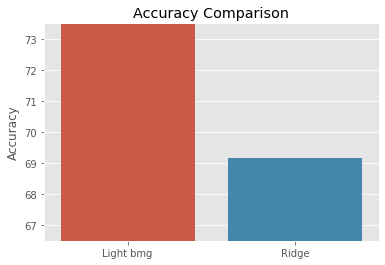

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [lbgm_acc,rg_acc]
plt.style.use('ggplot')
x = ['Light bmg', 'Ridge']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(70,70)

# Knn vs Light bmg

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-117-caf88df9a638>:9: UserWarning: Attempting to set identical bottom == top == 80 results in singular transformations; automatically expanding.
  ax.set_ylim(80,80)


(76.0, 84.0)

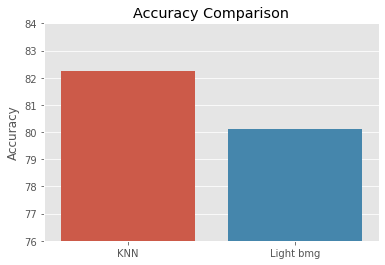

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [knn_acc,lbgm_acc]
plt.style.use('ggplot')
x = ['KNN', 'Light bmg']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(80,80)

# SVM vs KNN


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-118-2d7d2c0a808c>:9: UserWarning: Attempting to set identical bottom == top == 70 results in singular transformations; automatically expanding.
  ax.set_ylim(70,70)


(66.5, 73.5)

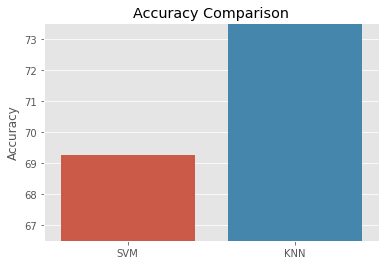

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [svm_acc,knn_acc]
plt.style.use('ggplot')
x = ['SVM', 'KNN']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(70,70)

#CNN vs KNN

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-119-deed2dc11610>:9: UserWarning: Attempting to set identical bottom == top == 84 results in singular transformations; automatically expanding.
  ax.set_ylim(84,84)


(79.8, 88.2)

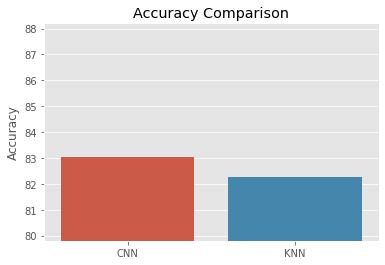

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [cnn_acc,knn_acc]
plt.style.use('ggplot')
x = ['CNN', 'KNN']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(84,84)